# =========================
# Load libraries
# =========================

In [5]:
import pandas as pd
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# =========================
# Load data
# =========================

In [6]:
# Load stanford data
data = pd.read_csv("../data/processed/stanford.csv")

train_data, test_data, train_labels, test_labels = train_test_split(
    data["text"], data["label"], test_size=0.2
)


# =========================
# One-hot encode
# =========================

In [7]:
# Create unique index for every word and fit to training data
tokenizer = Tokenizer(num_words = 10000)
tokenizer.fit_on_texts(train_data)

# Print the number of unique words found in the data set (not the limit placed
# on the tokenizer), use this as feedback to the num_words arg of Tokenizer().
print('Found %d unique words.' % len(tokenizer.word_index))

# One-hot encode
train_encodings = tokenizer.texts_to_matrix(train_data, mode = 'binary')

Found 54103 unique words.


# =========================
# Split data
# =========================

In [8]:
# Randomly shuffle data
indices = np.arange(train_encodings.shape[0])
np.random.shuffle(indices)
train_encodings = train_encodings[indices]
train_labels = train_labels[indices]

# Split into training and validation data (approximately 80:20)
x_train = train_encodings[:24000]
y_train = train_labels[:24000]
x_val   = train_encodings[24000:]
y_val   = train_labels[24000:]

/home/tcake/coding_projects/python/opt_out/study-online-misogyny/venv/lib/python3.7/site-packages/pandas/core/series.py:942: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


# =========================
# Build model
# =========================

In [9]:
# Note the input_shape of the first layer will match the num_words arg from
# the Tokenizer() function. Double check with len(data[0])
# The final sigmoid layer outputs probability values between [0, 1]
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

# =========================
# Train model
# =========================



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 24000 samples, validate on 811 samples
Epoch 1/20
24000/24000 [==============================] - 4s 157us/step - loss: nan - acc: 0.0074 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/20
24000/24000 [==============================] - 4s 166us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/20
24000/24000 [==============================] - 4s 169us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/20
24000/24000 [==============================] - 4s 185us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/20
24000/24000 [==============================] - 4s 159us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/20
24000/24000 [==============================] - 4s 152us/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 7/20
24000/24

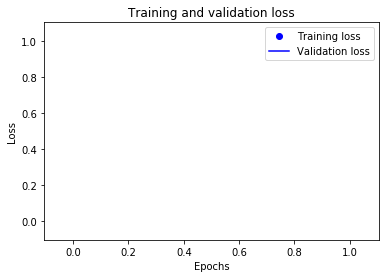

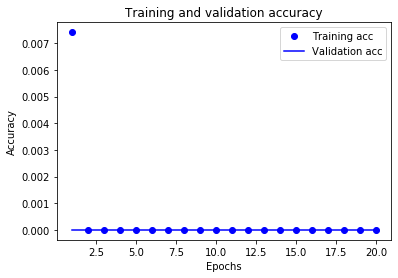

In [10]:
# As the model outputs probabilities, binary crossentropy is the best loss
# metric as it measures the distance between probability distributions
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history = model.fit(x_train,
                    y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val, y_val))

# Prep history dictionary
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot the training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.clf()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# =========================
# Retrain model
# =========================

In [11]:
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train, y_train, epochs = 5, batch_size = 512)

Epoch 1/5
24000/24000 [==============================] - 3s 131us/step - loss: nan - acc: 0.0083
Epoch 2/5
24000/24000 [==============================] - 3s 122us/step - loss: nan - acc: 0.0000e+00
Epoch 3/5
24000/24000 [==============================] - 3s 121us/step - loss: nan - acc: 0.0000e+00
Epoch 4/5
24000/24000 [==============================] - 3s 104us/step - loss: nan - acc: 0.0000e+00
Epoch 5/5
24000/24000 [==============================] - 3s 116us/step - loss: nan - acc: 0.0000e+00


# =========================
# Evaluate on test data
# =========================

In [12]:
# DO NOT retrain to tokenizer. Use the argument oov_token=True to reserve a
# token for unkown words. See https://bit.ly/2lNh15g

# One-hot encode
test_encodings = tokenizer.texts_to_matrix(test_data, mode = 'binary')

# Print results as ['loss', 'acc'] check names with model.metrics_names
model.evaluate(test_encodings, test_labels)

model.metrics_names



6203/6203 [==============================] - 1s 202us/step


['loss', 'acc']